This notebook is for postblast data parsing and preparing it for StructMan and thermostability checking tools.

In [28]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('orfs_Ovulgaris.blast', sep='\t', header=None)
dfBim = pd.read_csv('Obimaculoides_results.txt', sep='\t', header=None) 
headers = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

df.columns = headers
dfBim.columns = headers

dfBim.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,comp132291_c0_seq2,XP_014781815.1,58.824,68,18,6,2173,2232,461,526,5.300000e+00,32.7
1,comp134050_c0_seq1,XP_014773906.1,30.928,97,51,5,634,719,282,373,1.700000e+00,34.3
2,comp144751_c0_seq2,XP_014781927.1,22.687,335,227,8,2289,2617,881,1189,4.940000e-07,55.8
3,comp144751_c0_seq2,XP_014781927.1,21.703,364,237,11,2277,2617,175,513,2.900000e-02,40.0
4,comp144751_c0_seq2,XP_014777780.1,21.922,333,213,9,2292,2619,203,493,1.150000e-06,54.3


In [48]:
csv = 'Obimaculoides_results.txt'

<AxesSubplot:title={'center':'Percent Identity of ORFs to O. bimaculoides'}, ylabel='Frequency'>

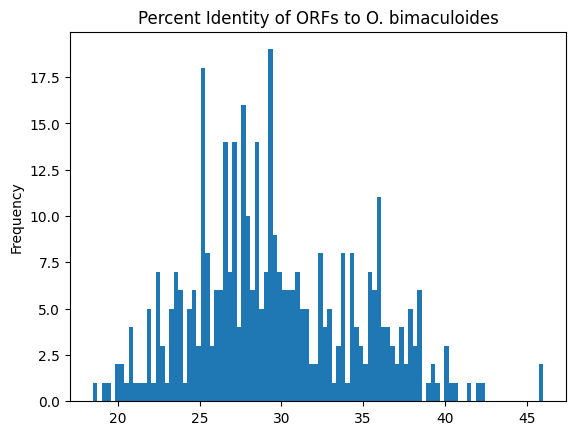

In [50]:
def blast_parser(csv):
    df = pd.read_csv(csv, sep='\t', header=None)
    headers = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']
    df.columns = headers
    df_filtered = df[df['evalue'] < 0.00001]
    return df_filtered['pident'].plot(kind='hist', bins=100, title='Percent Identity of ORFs to O. bimaculoides')


blast_parser(csv)

In [30]:
df_filtered = df[df['evalue'] < 0.00001]
dfBim_filtered = dfBim[dfBim['evalue'] < 0.00001]


In [10]:
df_filtered.head()

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,comp180239_c0_seq1,tr|A0A7E6FCQ6|A0A7E6FCQ6_OCTVU,97.251,582,16,0,493,2238,1,582,0.000000e+00,1141.0
1,comp180239_c0_seq1,tr|A0A7E6FCQ6|A0A7E6FCQ6_OCTVU,25.942,451,288,13,832,2121,226,651,3.980000e-18,89.7
2,comp180239_c0_seq1,tr|A0A7E6FBL3|A0A7E6FBL3_OCTVU,97.251,582,16,0,493,2238,1,582,0.000000e+00,1140.0
3,comp180239_c0_seq1,tr|A0A7E6FBL3|A0A7E6FBL3_OCTVU,25.942,451,288,13,832,2121,226,651,1.190000e-17,88.6
4,comp180239_c0_seq1,tr|A0A7E6FC89|A0A7E6FC89_OCTVU,59.114,587,238,2,484,2238,2,588,0.000000e+00,720.0


<AxesSubplot:title={'center':'Percent Identity of ORFs to O. vulgaris'}, ylabel='Frequency'>

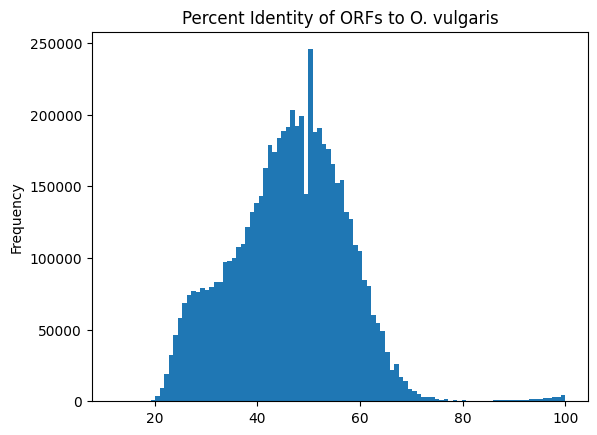

In [11]:
#build the plot, pident versus count
df_filtered['pident'].plot(kind='hist', bins=100, title='Percent Identity of ORFs to O. vulgaris')

In [44]:
df_ident = df_filtered[df_filtered['pident'] > 80]

df_ident

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore
0,comp180239_c0_seq1,tr|A0A7E6FCQ6|A0A7E6FCQ6_OCTVU,97.251,582,16,0,493,2238,1,582,0.000000,1141.0
2,comp180239_c0_seq1,tr|A0A7E6FBL3|A0A7E6FBL3_OCTVU,97.251,582,16,0,493,2238,1,582,0.000000,1140.0
348,comp180239_c0_seq1,tr|A0A7E6FC59|A0A7E6FC59_OCTVU,100.000,23,0,0,383,451,823,845,0.000009,50.1
1736,comp172522_c0_seq1,tr|A0A6P7SD53|A0A6P7SD53_OCTVU,99.363,785,5,0,115,2469,1,785,0.000000,1565.0
1737,comp172522_c0_seq1,tr|A0A6P7SC55|A0A6P7SC55_OCTVU,99.437,710,4,0,115,2244,1,710,0.000000,1456.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7811755,comp180730_c0_seq1,tr|A0A6P7TZ93|A0A6P7TZ93_OCTVU,96.750,523,8,1,367,1908,21,543,0.000000,1004.0
7811756,comp180730_c0_seq1,tr|A0A6P7U0S9|A0A6P7U0S9_OCTVU,96.929,521,7,1,373,1908,27,547,0.000000,1004.0
7811757,comp180730_c0_seq1,tr|A0A7E6FLH3|A0A7E6FLH3_OCTVU,96.935,522,7,1,370,1908,114,635,0.000000,1003.0
7811758,comp180730_c0_seq1,tr|A0A7E6FLB4|A0A7E6FLB4_OCTVU,96.743,522,8,1,370,1908,32,553,0.000000,1003.0


To do (making a .smlf file):

1. for starters, leave only prots with | in name (uniprot)
2. in xlsx, check qstartqend mutations - are they the same with start send mutations?
3. create a final .smlf file: uniprot id (split by |, third piece), mutations in format P234D

In [42]:
for cell in df_ident['sseqid']:
    if '|' in cell:
        print(df_ident[df_ident['sseqid'] == cell])


               qseqid                          sseqid  pident  length  \
0  comp180239_c0_seq1  tr|A0A7E6FCQ6|A0A7E6FCQ6_OCTVU  97.251     582   

   mismatch  gapopen  qstart  qend  sstart  send  evalue  bitscore  
0        16        0     493  2238       1   582     0.0    1141.0  
               qseqid                          sseqid  pident  length  \
2  comp180239_c0_seq1  tr|A0A7E6FBL3|A0A7E6FBL3_OCTVU  97.251     582   

   mismatch  gapopen  qstart  qend  sstart  send  evalue  bitscore  
2        16        0     493  2238       1   582     0.0    1140.0  
                     qseqid                          sseqid   pident  length  \
348      comp180239_c0_seq1  tr|A0A7E6FC59|A0A7E6FC59_OCTVU  100.000      23   
6031916  comp181628_c0_seq1  tr|A0A7E6FC59|A0A7E6FC59_OCTVU   98.291     117   
6995546  comp181628_c1_seq1  tr|A0A7E6FC59|A0A7E6FC59_OCTVU   97.368     456   

         mismatch  gapopen  qstart  qend  sstart  send        evalue  bitscore  
348             0        0  

KeyboardInterrupt: 